# 1. Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas_datareader as webreader
import pandas as pd
import tensorflow as tf
import time
import seaborn as sns
import datetime as dt

from datetime import date, timedelta, datetime
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader import data
from tensorflow import keras


In [ ]:
# Start run time
start_time = time.time()

In [ ]:
pip install yfinance pandas

# 2. Data Preprocessing and Visualization

# 2.1. Load Data

In [ ]:
import yfinance as yf
import pandas as pd

# Tải dữ liệu cổ phiếu của Tesla từ Yahoo Finance
tesla_data = yf.download('TSLA', start='2010-06-29', end='2024-06-05')

# Chọn các cột cần thiết
tesla_data = tesla_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Đặt lại tên cột để dễ hiểu hơn
tesla_data.reset_index(inplace=True)
tesla_data.rename(columns={'Date': 'Date', 'Open': 'Open', 'High': 'High', 'Low': 'Low', 'Close': 'Close', 'Adj Close': 'Adj Close', 'Volume': 'Volume'}, inplace=True)

# Xuất dữ liệu ra file CSV
tesla_data.to_csv('tesla_stock_data.csv', index=False)

print("Dữ liệu đã được trích xuất ra file 'tesla_stock_data.csv'")


[*********************100%%**********************]  1 of 1 completed

Dữ liệu đã được trích xuất ra file 'tesla_stock_data.csv'


# 2.2. Analyze Data

In [ ]:
df_old

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3502,2024-05-29,174.190002,178.149994,173.929993,176.190002,176.190002,54782600
3503,2024-05-30,178.580002,182.669998,175.380005,178.789993,178.789993,77784800
3504,2024-05-31,178.500000,180.320007,173.820007,178.080002,178.080002,67314600
3505,2024-06-03,178.130005,182.639999,174.490005,176.289993,176.289993,68568900


In [ ]:
# Brief info about dataframe - non-null values and datatype
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507 entries, 0 to 3506
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3507 non-null   object 
 1   Open       3507 non-null   float64
 2   High       3507 non-null   float64
 3   Low        3507 non-null   float64
 4   Close      3507 non-null   float64
 5   Adj Close  3507 non-null   float64
 6   Volume     3507 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 191.9+ KB


In [ ]:
# Check for missing values
df_old.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Drop/impute missing values (if required)
df_old = df_old.dropna(how='any', axis=0)

# Check for missing values
df_old.isnull().sum()

# imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# imputer.fit_transform(dataset)
# dataset = imputer.transform(dataset)
# df.dropna(inplace=True)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Window size
win = 7

In [ ]:
# Compute rolling averages and append to existing dataframe (df)

# Date
dates = []
# Get current date
current_date = pd.to_datetime(df_old['Date'].iloc[-1], format='%Y-%m-%d').date()
# Append next "win" days
for i in range(0, win):
  current_date += timedelta(days=1)
  dates.append(current_date)
# Convert to Pandas DataFrame
dates = pd.to_datetime(dates, format='%Y-%m-%d')
next_days = pd.DataFrame(dates)
# Append to new dataframe
df_date = pd.concat([df_old['Date'], next_days], ignore_index=True)

# Open stock price
rolling_open = df_old['Open'].rolling(window=win).mean()[(-win-1):-1]
# rolling_open = pd.DataFrame(rolling_open)
# Append to new dataframe
df_open = pd.concat([df_old['Open'], rolling_open], ignore_index=True)

# High stock price
rolling_high = df_old['High'].rolling(window=win).mean()[(-win-1):-1]
# Append to new dataframe
df_high = pd.concat([df_old['High'], rolling_high], ignore_index=True)

# Low stock price
rolling_low = df_old['Low'].rolling(window=win).mean()[(-win-1):-1]
# Append to new dataframe
df_low = pd.concat([df_old['Low'], rolling_low], ignore_index=True)

# Closing stock price (dependent variable)
rolling_close = df_old['Close'].rolling(window=win).mean()[(-win-1):-1]
# Append to new dataframe
df_close = pd.concat([df_old['Close'], rolling_close], ignore_index=True)

# Adjusted closing stock price
rolling_adj_close = df_old['Adj Close'].rolling(window=win).mean()[(-win-1):-1]
# Append to new dataframe
df_adj_close = pd.concat([df_old['Adj Close'], rolling_adj_close], ignore_index=True)

# Volume of stocks
rolling_volume = df_old['Volume'].rolling(window=win).mean()[(-win-1):-1]
# Append to new dataframe
df_volume = pd.concat([df_old['Volume'], rolling_volume], ignore_index=True)

# New dataframe
df = pd.concat([df_date, df_open, df_high, df_low, df_close, df_adj_close, df_volume], axis=1)
# Rename first column
# [0, 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df = df.rename(columns={df.columns[0]: "Date", df.columns[1]: "Open", df.columns[2]: "High",
                        df.columns[3]: "Low", df.columns[4]: "Close", df.columns[5]: "Adj Close",
                        df.columns[6]: "Volume"})

In [ ]:
# Dataframe statistics on quantitative (numerical) values
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3514.000000,3514.000000,3514.000000,3514.000000,3514.000000,3.514000e+03
mean,74.206462,75.819173,72.470673,74.181880,74.181880,9.681759e+07
std,102.003271,104.248458,99.532347,101.920241,101.920241,7.888808e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,11.370000,11.633333,11.061001,11.344167,11.344167,4.725338e+07
50%,17.341666,17.584666,17.001000,17.339000,17.339000,8.198130e+07
75%,149.227505,152.197498,145.425838,149.063335,149.063335,1.225999e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [ ]:
# Input data of np array - Closing price
dataset = df.iloc[:, 4:5].values

# Dataset shape
print(dataset.shape)

(3514, 1)


# 2.3.  Data Visualization

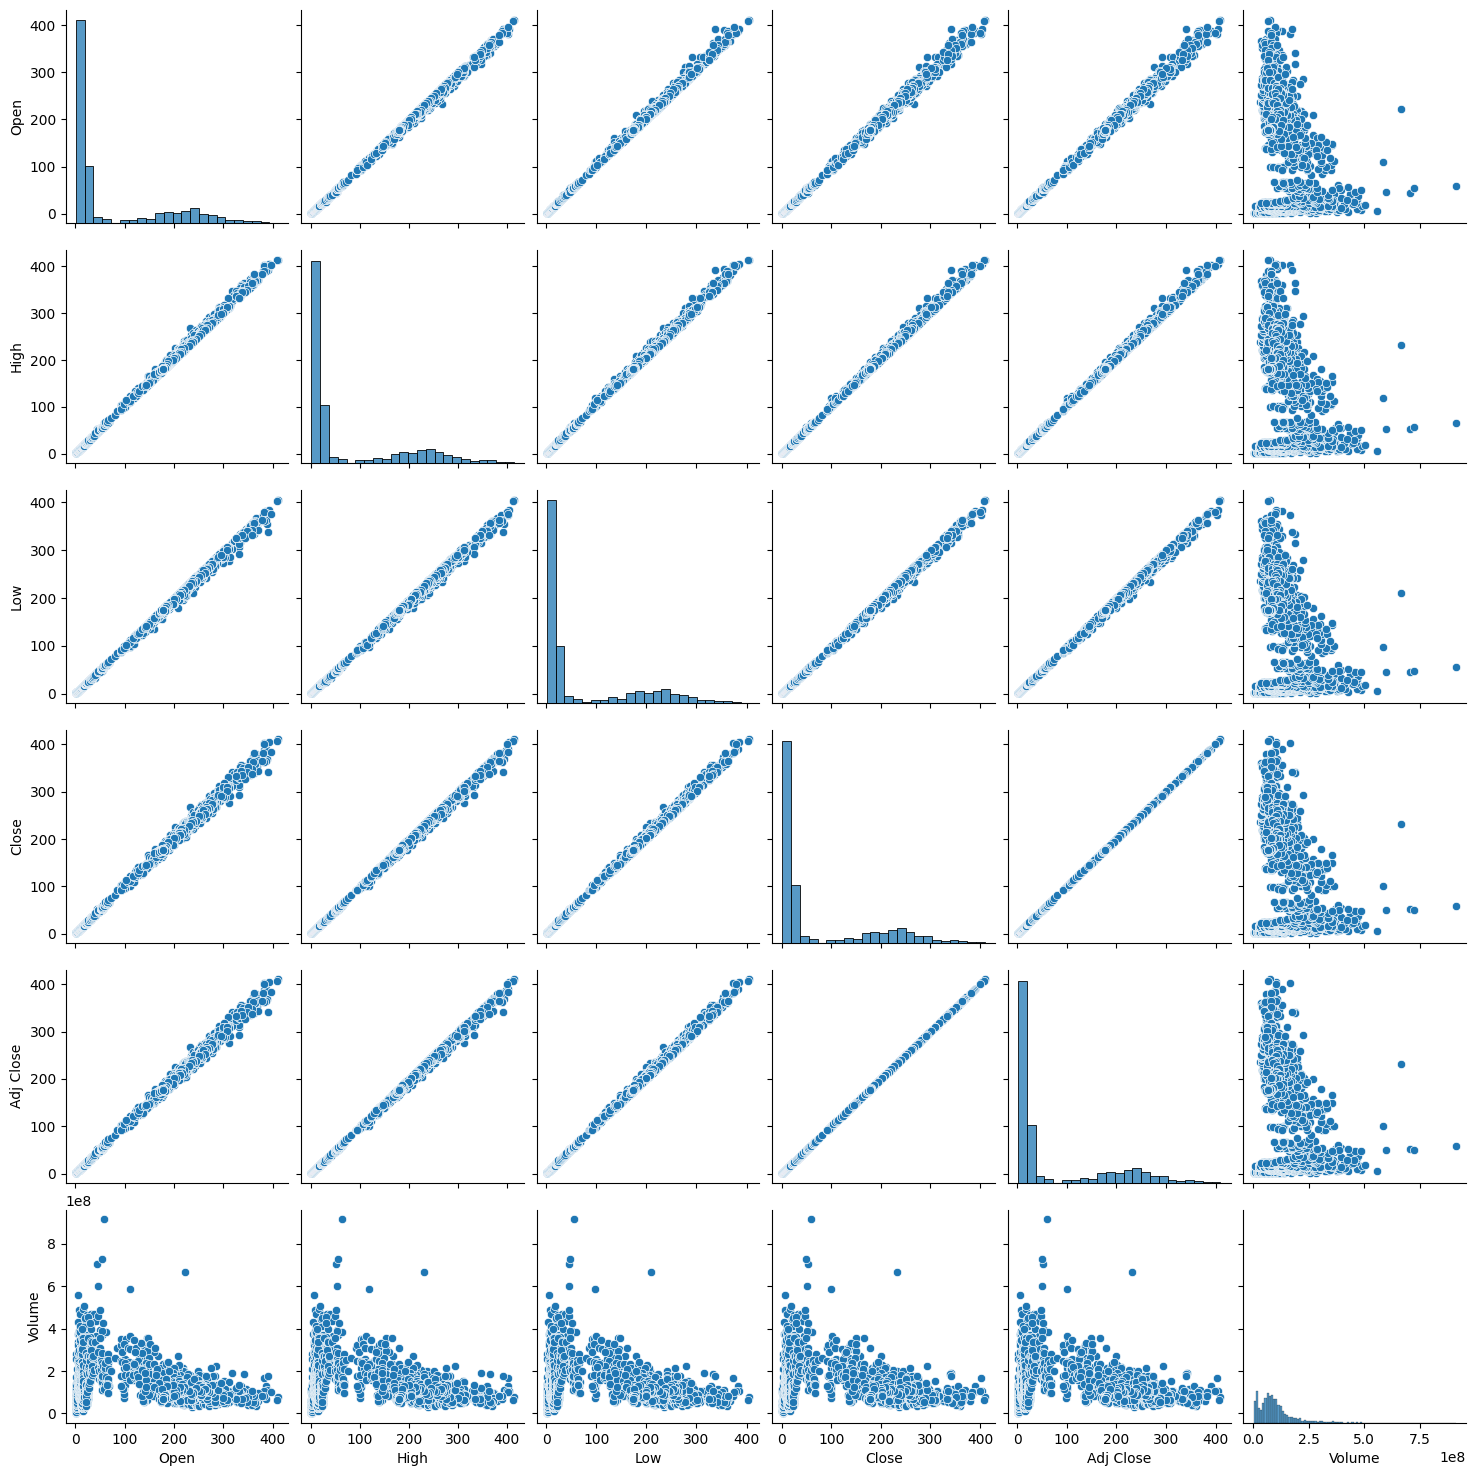

In [ ]:
# Pairwise distributions
sns.pairplot(df)

# Show figure
plt.show()

# Correlation Map

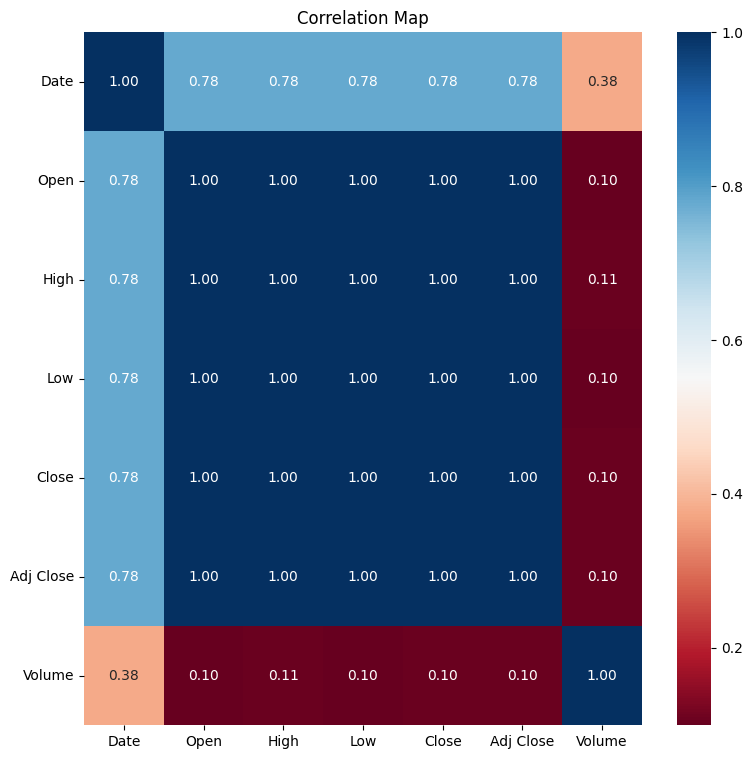

In [ ]:
# Chuyển đổi kiểu dữ liệu của cột `date` thành `datetime`
df['Date'] = pd.to_datetime(df['Date'])
# Define figure
plt.figure(figsize=(9,9))

# Correlation Map
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='RdBu', fmt='.2f')
# Adjust X and Y-Axes
plt.xticks(rotation=0)
plt.yticks(rotation=0)
# Plot title
plt.title('Correlation Map')

# Show figure
plt.show()

# Individual stock prices and volume distribution

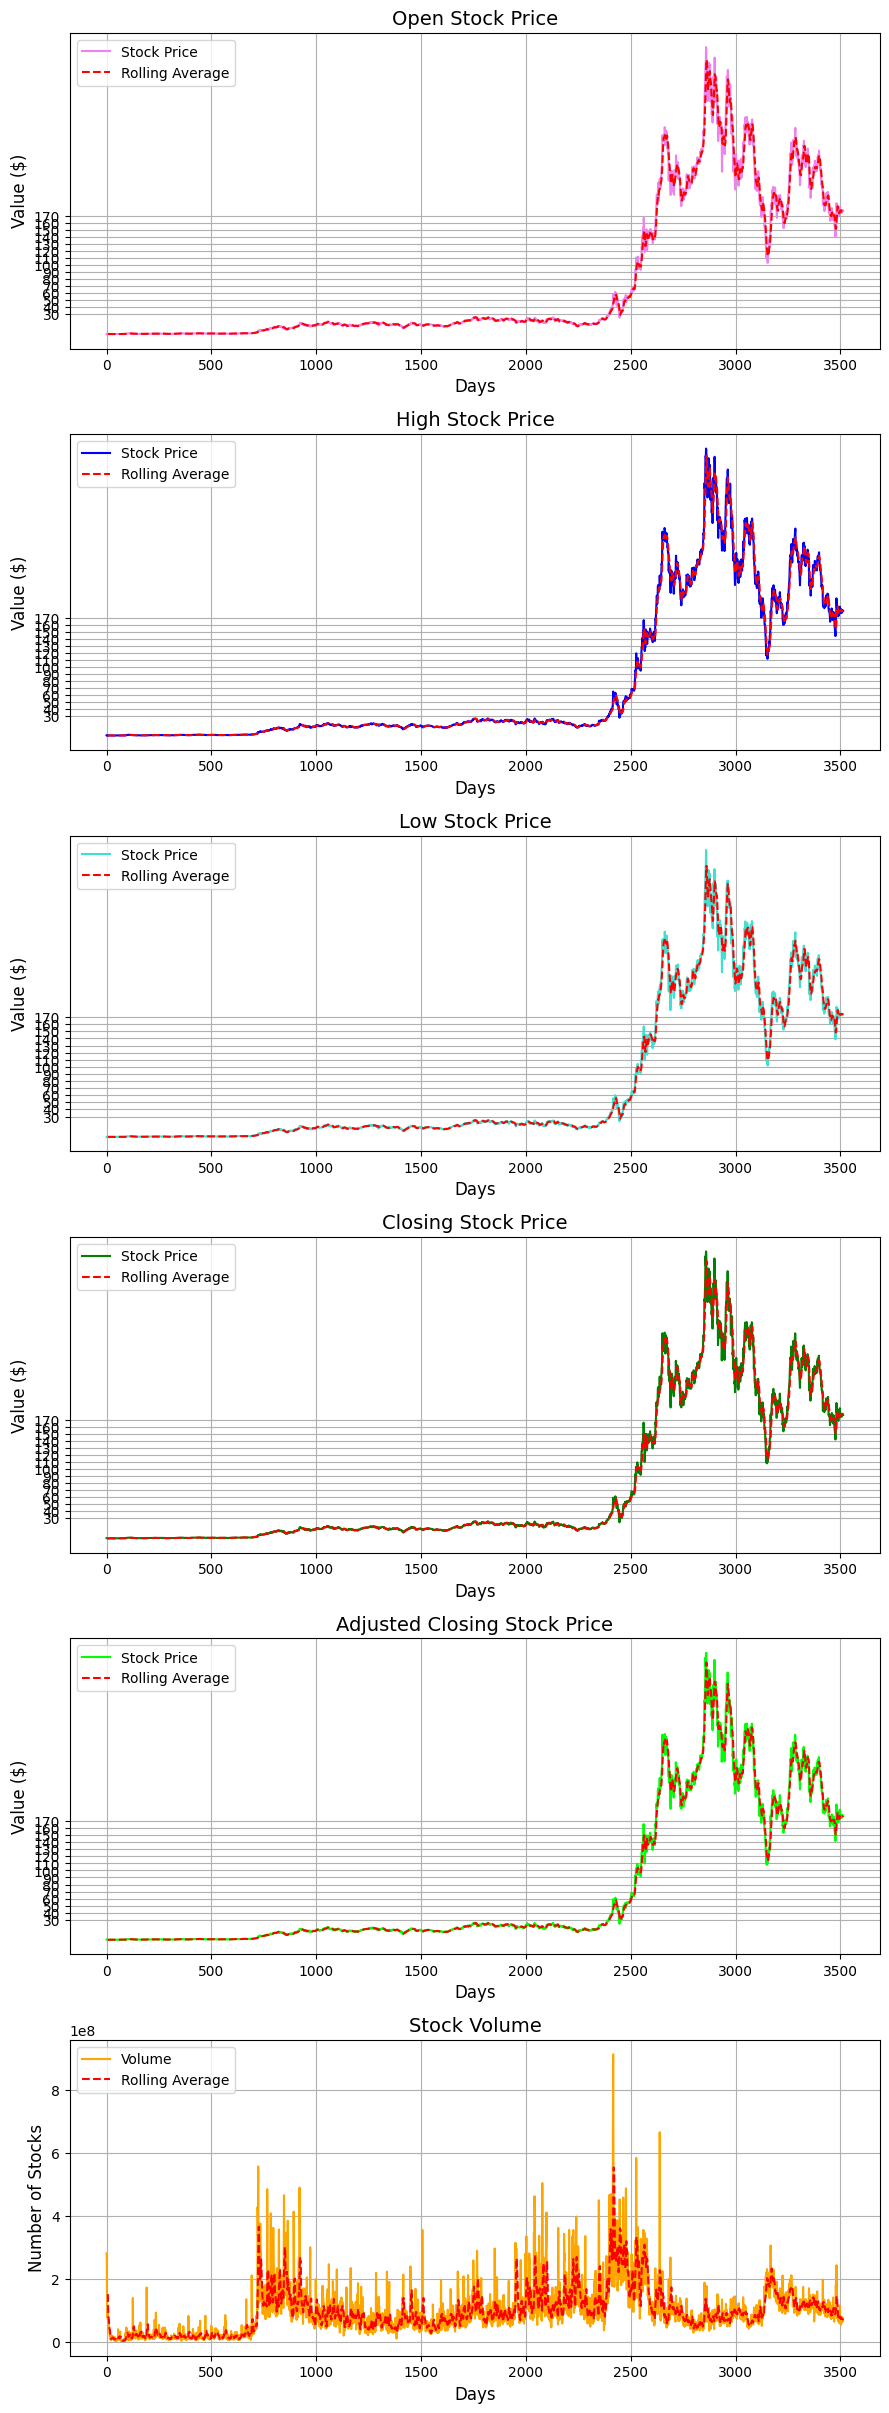

In [ ]:
# Define stock prices figure
bmo_stock_prices = plt.figure(figsize=(9,24))

# Open Stock Price
ax1 = bmo_stock_prices.add_subplot(6, 1, 1)
ax1 = plt.plot(df['Open'], color = 'violet', label = 'Stock Price')
# Rolling Average
ax1 = plt.plot(df['Open'].rolling(window=7).mean(), "--", color = 'red', label = 'Rolling Average')
# Adjust axes range(s)
# plt.xticks(np.arange(0, 2250, 250))
plt.yticks(np.arange(30, 180, 10))
# Adjust spacing
plt.tight_layout()
# Plot title and labels
plt.xlabel('Days', fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.title('Open Stock Price', fontsize=14)
# Plot legend and grid
plt.legend(loc = 'upper left')
plt.grid(True)

# High Stock Price
ax2 = bmo_stock_prices.add_subplot(6, 1, 2)
ax2 = plt.plot(df['High'], color = 'blue', label = 'Stock Price')
# Rolling Average
ax2 = plt.plot(df['High'].rolling(window=7).mean(), "--", color = 'red', label = 'Rolling Average')
# Adjust axes range(s)
# plt.xticks(np.arange(0, 2250, 250))
plt.yticks(np.arange(30, 180, 10))
# Adjust spacing
plt.tight_layout()
# Plot title and labels
plt.xlabel('Days', fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.title('High Stock Price', fontsize=14)
# Plot legend and grid
plt.legend(loc = 'upper left')
plt.grid(True)

# Low Stock Price
ax3 = bmo_stock_prices.add_subplot(6, 1, 3)
ax3 = plt.plot(df['Low'], color = 'turquoise', label = 'Stock Price')
# Rolling Average
ax3 = plt.plot(df['Low'].rolling(window=7).mean(), "--", color = 'red', label = 'Rolling Average')
# Adjust axes range(s)
# plt.xticks(np.arange(0, 2250, 250))
plt.yticks(np.arange(30, 180, 10))
# Adjust spacing
plt.tight_layout()
# Plot title and labels
plt.xlabel('Days', fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.title('Low Stock Price', fontsize=14)
# Plot legend and grid
plt.legend(loc = 'upper left')
plt.grid(True)

# Closing Stock Price (target variable)
ax4 = bmo_stock_prices.add_subplot(6, 1, 4)
ax4 = plt.plot(df['Close'], color = 'green', label = 'Stock Price')
# Rolling Average
ax4 = plt.plot(df['Close'].rolling(window=7).mean(), "--", color = 'red', label = 'Rolling Average')
# Adjust axes range(s)
# plt.xticks(np.arange(0, 2250, 250))
plt.yticks(np.arange(30, 180, 10))
# Adjust spacing
plt.tight_layout()
# Plot title and labels
plt.xlabel('Days', fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.title('Closing Stock Price', fontsize=14)
# Plot legend and grid
plt.legend(loc = 'upper left')
plt.grid(True)

# Adjusting Closing Stock Price
ax5 = bmo_stock_prices.add_subplot(6, 1, 5)
ax5 = plt.plot(df['Adj Close'], color = 'lime', label = 'Stock Price')
# Rolling Average
ax5 = plt.plot(df['Adj Close'].rolling(window=7).mean(), "--", color = 'red', label = 'Rolling Average')
# Adjust axes range(s)
# plt.xticks(np.arange(0, 2250, 250))
plt.yticks(np.arange(30, 180, 10))
# Adjust spacing
plt.tight_layout()
# Plot title and labels
plt.xlabel('Days', fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.title('Adjusted Closing Stock Price', fontsize=14)
# Plot legend and grid
plt.legend(loc = 'upper left')
plt.grid(True)

# Volume (number of stocks)
ax6 = bmo_stock_prices.add_subplot(6, 1, 6)
ax6 = plt.plot(df['Volume'], color = 'orange', label = 'Volume')
# Rolling Average
ax6 = plt.plot(df['Volume'].rolling(window=7).mean(), "--", color = 'red', label = 'Rolling Average')
# Adjust axes range(s)
# plt.xticks()
# plt.yticks()
# Adjust spacing
plt.tight_layout()
# Plot title and labels
plt.xlabel('Days', fontsize=12)
plt.ylabel('Number of Stocks', fontsize=12)
plt.title('Stock Volume', fontsize=14)
# Plot legend and grid
plt.legend(loc = 'upper left')
plt.grid(True)

# Show plot
plt.show()

# Combined distributions

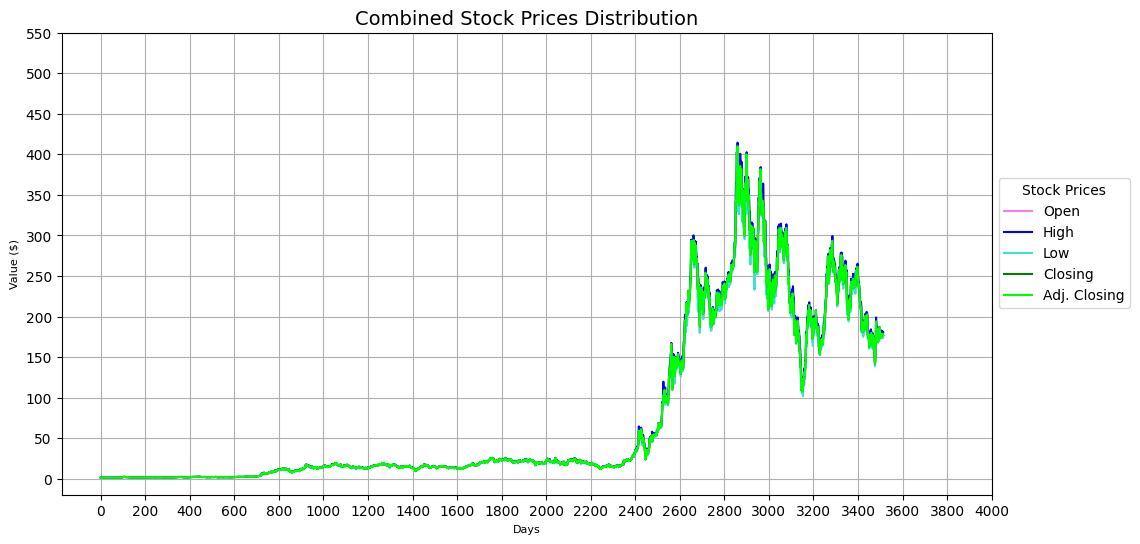

In [ ]:
# Define figure
bmo_stock_prices_comb = plt.figure(figsize=(12,6))

# Open Stock Price
bmo_stock_prices_comb = plt.plot(df['Open'], color = 'violet', label = 'Open')
# High Stock Price
bmo_stock_prices_comb = plt.plot(df['High'], color = 'blue', label = 'High')
# Low Stock Price
bmo_stock_prices_comb = plt.plot(df['Low'], color = 'turquoise', label = 'Low')
# Closing Stock Price
bmo_stock_prices_comb = plt.plot(df['Close'], color = 'green', label = 'Closing')
# Adjusted Closing Stock Price
bmo_stock_prices_comb = plt.plot(df['Adj Close'], color = 'lime',
                                 label = 'Adj. Closing')
# Adjust X and Y-Axes ranges
plt.xticks(np.arange(0, 4200, 200))
plt.yticks(np.arange(0, 600, 50))
# Plot title and labels
plt.xlabel('Days', fontsize=8)
plt.ylabel('Value ($)', fontsize=8)
plt.title('Combined Stock Prices Distribution', fontsize=14)
# Plot legend and grid
plt.legend(title="Stock Prices", bbox_to_anchor=(1, 0.7))
plt.grid(True)

# Show plot
plt.show()

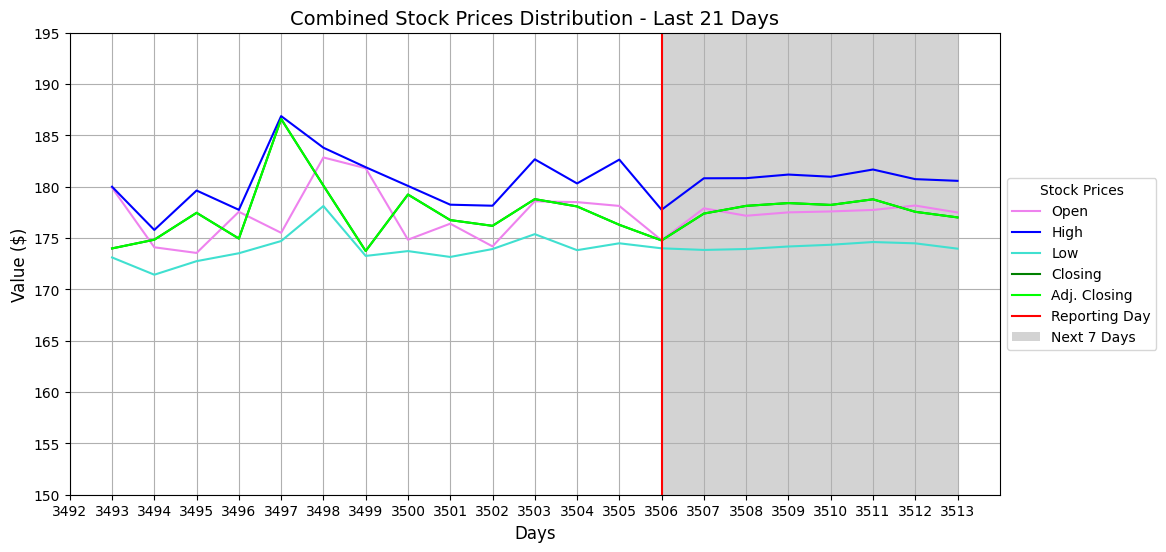

In [ ]:
# Define figure - Last 21 days
bmo_comb_last_21 = plt.figure(figsize=(12,6))

# Open Stock Price
bmo_comb_last_21 = plt.plot(df['Open'].iloc[-21:], color = 'violet', label = 'Open')
# High Stock Price
bmo_comb_last_21 = plt.plot(df['High'].iloc[-21:], color = 'blue', label = 'High')
# Low Stock Price
bmo_comb_last_21 = plt.plot(df['Low'].iloc[-21:], color = 'turquoise', label = 'Low')
# Closing Stock Price
bmo_comb_last_21 = plt.plot(df['Close'].iloc[-21:], color = 'green', label = 'Closing')
# Adjusted Closing Stock Price
bmo_comb_last_21 = plt.plot(df['Adj Close'].iloc[-21:], color = 'lime',
                            label = 'Adj. Closing')
# Next 7 days (rolling average region)
bmo_results_last_21 = plt.axvline(x=(len(df)-(win+1)), color='red', label='Reporting Day')
bmo_results_last_21 = plt.axvspan(len(df)-8, len(df)-1, facecolor='lightgrey', label='Next 7 Days')

# Adjust X and Y-Axes ranges
# plt.xticks(np.arange(0, 22, 1))
plt.xticks(np.arange(len(df)-22, len(df), 1))
plt.yticks(np.arange(150, 200, 5))
# Plot title and labels
plt.xlabel('Days', fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.title('Combined Stock Prices Distribution - Last 21 Days', fontsize=14)
# Plot legend and grid
plt.legend(title="Stock Prices", bbox_to_anchor=(1, 0.7))
plt.grid(True)

# Show plot
plt.show()

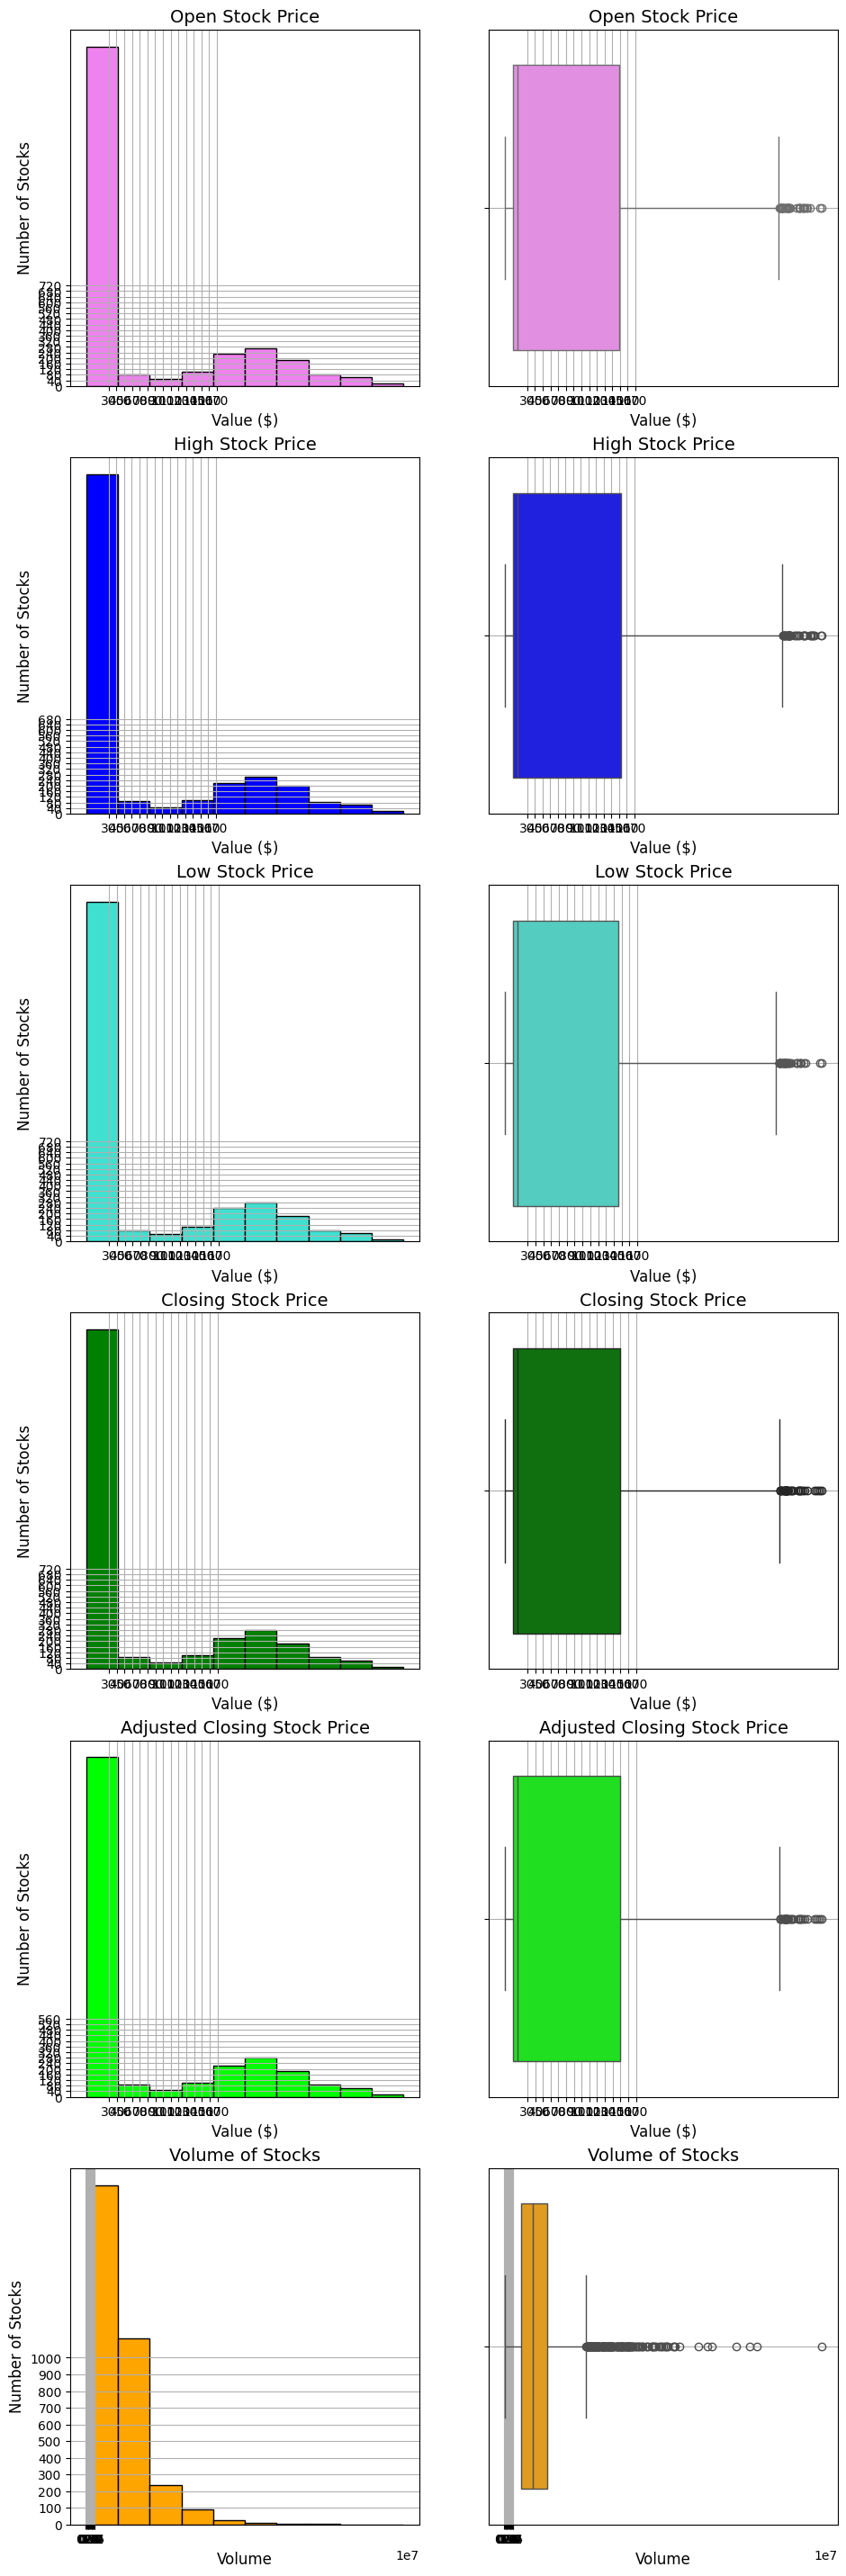

In [ ]:
# Define figure
bmo_comb_dist = plt.figure(figsize=(11, 36))

# -- Open Stock Prices --

# Histogram
ax1 = bmo_comb_dist.add_subplot(6, 2, 1)
ax1 = plt.hist(x=df['Open'], color='violet', edgecolor='black')
# Adjust axes range(s)
plt.xticks(np.arange(30, 180, 10))
plt.yticks(np.arange(0, 760, 40))
# Plot title and label(s)
plt.xlabel('Value ($)', fontsize=12)
plt.ylabel('Number of Stocks', fontsize=12)
plt.title('Open Stock Price', fontsize=14)
# Plot grid
plt.grid(True)

# Box Plot
ax2 = bmo_comb_dist.add_subplot(6, 2, 2)
ax2 = sns.boxplot(x=df['Open'], color='violet')
# Adjust X-Axis range(s)
plt.xticks(np.arange(30, 180, 10))
# Plot title and label(s)
plt.xlabel('Value ($)', fontsize=12)
plt.title('Open Stock Price', fontsize=14)
# Plot grid
plt.grid(True)

# -- High Stock Prices --

# Histogram
ax3 = bmo_comb_dist.add_subplot(6, 2, 3)
ax3 = plt.hist(x=df['High'], color='blue', edgecolor='black')
# Adjust axes range(s)
plt.xticks(np.arange(30, 180, 10))
plt.yticks(np.arange(0, 720, 40))
# Plot title and label(s)
plt.xlabel('Value ($)', fontsize=12)
plt.ylabel('Number of Stocks', fontsize=12)
plt.title('High Stock Price', fontsize=14)
# Plot grid
plt.grid(True)

# Box Plot
ax4 = bmo_comb_dist.add_subplot(6, 2, 4)
ax4 = sns.boxplot(x=df['High'], color='blue')
# Adjust X-Axis range(s)
plt.xticks(np.arange(30, 180, 10))
# Plot title and label(s)
plt.xlabel('Value ($)', fontsize=12)
plt.title('High Stock Price', fontsize=14)
# Plot grid
plt.grid(True)

# -- Low Stock Prices --

# Histogram
ax5 = bmo_comb_dist.add_subplot(6, 2, 5)
ax5 = plt.hist(x=df['Low'], color='turquoise', edgecolor='black')
# Adjust axes range(s)
plt.xticks(np.arange(30, 180, 10))
plt.yticks(np.arange(0, 760, 40))
# Plot title and label(s)
plt.xlabel('Value ($)', fontsize=12)
plt.ylabel('Number of Stocks', fontsize=12)
plt.title('Low Stock Price', fontsize=14)
# Plot grid
plt.grid(True)

# Box Plot
ax6 = bmo_comb_dist.add_subplot(6, 2, 6)
ax6 = sns.boxplot(x=df['Low'], color='turquoise')
# Adjust X-Axis range(s)
plt.xticks(np.arange(30, 180, 10))
# Plot title and label(s)
plt.xlabel('Value ($)', fontsize=12)
plt.title('Low Stock Price', fontsize=14)
# Plot grid
plt.grid(True)

# -- Closing Stock Prices --

# Histogram
ax7 = bmo_comb_dist.add_subplot(6, 2, 7)
ax7 = plt.hist(x=df['Close'], color='green', edgecolor='black')
# Adjust axes range(s)
plt.xticks(np.arange(30, 180, 10))
plt.yticks(np.arange(0, 760, 40))
# Plot title and label(s)
plt.xlabel('Value ($)', fontsize=12)
plt.ylabel('Number of Stocks', fontsize=12)
plt.title('Closing Stock Price', fontsize=14)
# Plot grid
plt.grid(True)

# Box Plot
ax8 = bmo_comb_dist.add_subplot(6, 2, 8)
ax8 = sns.boxplot(x=df['Close'], color='green')
# Adjust X-Axis range(s)
plt.xticks(np.arange(30, 180, 10))
# Plot title and label(s)
plt.xlabel('Value ($)', fontsize=12)
plt.title('Closing Stock Price', fontsize=14)
# Plot grid
plt.grid(True)

# -- Adjusted Closing Stock Prices --

# Histogram
ax9 = bmo_comb_dist.add_subplot(6, 2, 9)
ax9 = plt.hist(x=df['Adj Close'], color='lime', edgecolor='black')
# Adjust axes range(s)
plt.xticks(np.arange(30, 180, 10))
plt.yticks(np.arange(0, 600, 40))
# Plot title and label(s)
plt.xlabel('Value ($)', fontsize=12)
plt.ylabel('Number of Stocks', fontsize=12)
plt.title('Adjusted Closing Stock Price', fontsize=14)
# Plot grid
plt.grid(True)

# Box Plot
ax10 = bmo_comb_dist.add_subplot(6, 2, 10)
ax10 = sns.boxplot(x=df['Adj Close'], color='lime')
# Adjust X-Axis range(s)
plt.xticks(np.arange(30, 180, 10))
# Plot title and label(s)
plt.xlabel('Value ($)', fontsize=12)
plt.title('Adjusted Closing Stock Price', fontsize=14)
# Plot grid
plt.grid(True)

# -- Volume of Stocks --

# Histogram
ax11 = bmo_comb_dist.add_subplot(6, 2, 11)
ax11 = plt.hist(x=df['Volume'], color='orange', edgecolor='black')
# Adjust axes range(s)
plt.xticks(np.arange(0, 28000000, 2000000))
plt.yticks(np.arange(0, 1100, 100))
# Plot title and label(s)
plt.xlabel('Volume', fontsize=12)
plt.ylabel('Number of Stocks', fontsize=12)
plt.title('Volume of Stocks', fontsize=14)
# Plot grid
plt.grid(True)

# Box Plot
ax12 = bmo_comb_dist.add_subplot(6, 2, 12)
ax12 = sns.boxplot(x=df['Volume'], color='orange')
# Adjust X-Axis range(s)
plt.xticks(np.arange(0, 28000000, 2000000))
# Plot title and label(s)
plt.xlabel('Volume', fontsize=12)
plt.title('Volume of Stocks', fontsize=14)
# Plot grid
plt.grid(True)

# Show subplot
plt.show()

# 2.4. Feature Engineering

In [ ]:
# Normalize data
sc = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = sc.fit_transform(dataset)

In [ ]:
dataset_scaled

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.43461411],
       [0.4316376 ],
       [0.43030307]])

In [ ]:
# Split dataset into training set and test set (80/20 split)
training_size = int(len(df)*0.8)
dataset_train = dataset_scaled[:training_size]
dataset_test = dataset_scaled[training_size:]

print('Training set shape: ' + str(dataset_train.shape))
print('Test set shape: ' + str(dataset_test.shape))

Training set shape: (2811, 1)
Test set shape: (703, 1)


In [ ]:
# Define number of timesteps (number of business days)
timesteps = 60

In [ ]:
# Predict stock price results using n timesteps
def define_training_data(timesteps, dataset):
  """
  timesteps - number of timesteps (business days)
  dataset   - stock prices (training) dataset
  """

  # X - number of timesteps, y - indicators (features) used for training
  X, y = [], []
  for i in range(timesteps, dataset.shape[0]):
    # Get number of timesteps (business days)
    X.append(dataset[i-timesteps:i, 0])
    # Starting date of reporting (increments during model training)
    y.append(dataset[i, 0])
  # Convert to NumPy array
  X, y = np.array(X), np.array(y)
  return X, y

X_train, y_train = define_training_data(timesteps, dataset_train)
print(X_train.shape, y_train.shape)

(2751, 60) (2751,)


In [ ]:
# Reshape (number of rows, number of timesteps (columns), number of predictors)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [ ]:
X_train

array([[[1.31893362e-03],
        [1.30915180e-03],
        [1.00428027e-03],
        ...,
        [8.57551250e-04],
        [8.10272656e-04],
        [6.63543343e-04]],

       [[1.30915180e-03],
        [1.00428027e-03],
        [5.54310805e-04],
        ...,
        [8.10272656e-04],
        [6.63543343e-04],
        [6.13002588e-04]],

       [[1.00428027e-03],
        [5.54310805e-04],
        [5.05407544e-05],
        ...,
        [6.63543343e-04],
        [6.13002588e-04],
        [7.01040118e-04]],

       ...,

       [[5.07079669e-01],
        [5.06003650e-01],
        [4.90694921e-01],
        ...,
        [5.46411261e-01],
        [5.51946181e-01],
        [5.73173019e-01]],

       [[5.06003650e-01],
        [4.90694921e-01],
        [4.64381504e-01],
        ...,
        [5.51946181e-01],
        [5.73173019e-01],
        [5.74958214e-01]],

       [[4.90694921e-01],
        [4.64381504e-01],
        [4.85746894e-01],
        ...,
        [5.73173019e-01],
        [5.7495

In [ ]:
# X_train: (number of rows, number of columns, number of predictors)
X_train.shape

(2751, 60, 1)

# 3. Define and Evaluate LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Epoch 1/100
86/86 [==============================] - 21s 140ms/step - loss: 0.0017
Epoch 2/100
86/86 [==============================] - 12s 144ms/step - loss: 8.1303e-04
Epoch 3/100
86/86 [==============================] - 13s 150ms/step - loss: 6.2163e-04
Epoch 4/100
86/86 [==============================] - 13s 151ms/step - loss: 6.1520e-04
Epoch 5/100
86/86 [==============================] - 13s 150ms/step - loss: 6.9335e-04
Epoch 6/100
86/86 [==============================] - 13s 151ms/step - loss: 4.6534e-04
Epoch 7/100
86/86 [==============================] - 13s 151ms/step - loss: 5.0013e-04
Epoch 8/100
86/86 [==============================] - 15s 179ms/step - loss: 4.2572e-04
Epoch 9/100
86/86 [==============================] - 13s 150ms/step - loss: 4.2925e-04
Epoch 10/100
86/86 [==============================] - 13s 151ms/step - loss: 5.0627e-04
Epoch 11/100
86/86 [==============================] - 13s 152ms/step - loss: 4.3004e-04
Epoch 12/100
86/86 [=========================

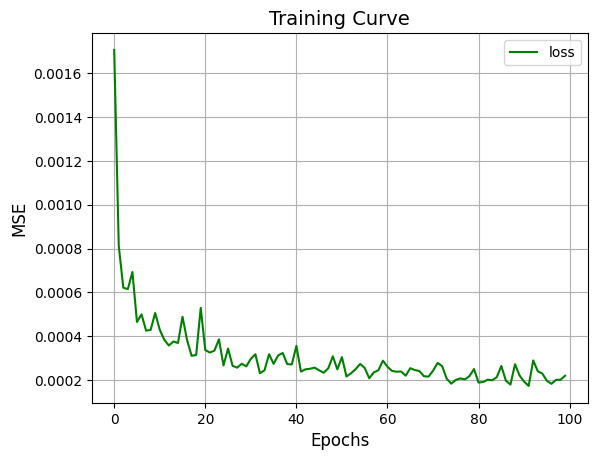

In [ ]:
# Define model
reg = Sequential()

# -- LSTM layers --

# Input and first (hidden) layer (with dropout regularization)
reg.add(LSTM(units=70, return_sequences=True,
             input_shape=(X_train.shape[1], X_train.shape[2])))
reg.add(Dropout(0.2))

# Additional hidden layers
reg.add(LSTM(units=70, return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units=70, return_sequences=True))
reg.add(Dropout(0.15))
reg.add(LSTM(units=70, return_sequences=False))
reg.add(Dropout(0.15))

# Output layer
reg.add(Dense(units=X_train.shape[2]))

# Compile model
reg.compile(optimizer='adam', loss='mean_squared_error')

# Train (fit) model
history = reg.fit(X_train, y_train, batch_size=32, epochs=100)

# Summarize LSTM model
reg.summary()

# Plot loss during training (Mean Squared Error - MSE)
plt.plot(history.history['loss'], 'g', label='loss')
# Plot title and labels
plt.title('Training Curve', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('MSE', fontsize=12)
# Plot legend and grid
plt.legend()
plt.grid(True)

# Show loss results
plt.show()

# Make predictions

In [ ]:
# Get n (number of timesteps) previous stock prices for predicting
inputs = dataset[len(dataset)-len(dataset_test) - timesteps:]
# Reshape input values
inputs = inputs.reshape(-1, 1)
# Scale input values, directly apply transformations (already fitted)
inputs = sc.transform(inputs)

# Define test set structure
X_test = []
# For the entire test set
for i in range(timesteps, timesteps + len(dataset_test)):
  # Range of values from i-60 to i, first column
  X_test.append(inputs[i-timesteps:i, 0])
# Convert to NumPy array
X_test = np.array(X_test)

# Obtain 3D structure of the test set
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Predict the test set results
predicted_stock_price = reg.predict(X_test)
# Apply inverse transformations
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = sc.inverse_transform(dataset_test)

# Print predicted and real stock prices side-by-side (if required)
# print(np.concatenate((predicted_stock_price.reshape(len(predicted_stock_price), 1),
#                       real_stock_price.reshape(len(real_stock_price), 1)), 1 ))

# Print Scores
print('')
print('--- Prediction Scores ---')
print('')
# Mean Absolute Error (MAE)
print('MAE: %.3f' % (mean_absolute_error(real_stock_price, predicted_stock_price)))
# Mean Squared Error (MSE)
print('MSE: %.3f' % (mean_squared_error(real_stock_price, predicted_stock_price)))
# Root Mean Squared Error (RMSE)
print('RMSE: %.3f' % (mean_squared_error(real_stock_price, predicted_stock_price, squared=False)))
# R^2 Score (Goodness-of-Fit)
print('R^2 Score: %.3f%%' % (r2_score(real_stock_price, predicted_stock_price) * 100))

22/22 [==============================] - 7s 82ms/step

--- Prediction Scores ---

MAE: 14.497
MSE: 526.044
RMSE: 22.936
R^2 Score: 85.934%


# Visualize Prediction Results

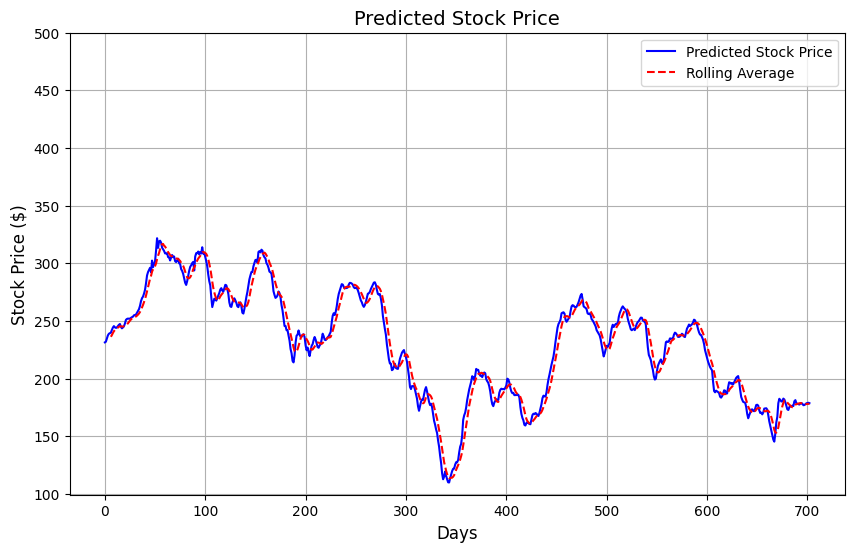

In [ ]:
# Define figure
bmo_pred_results = plt.figure(figsize=(10,6))

# Plot results
bmo_pred_results = plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
# Plot rolling average
df_real = pd.DataFrame(predicted_stock_price)
rolling_avg_pred = df_real.rolling(window = 7).mean()
bmo_pred_results = plt.plot(rolling_avg_pred, "--", color = 'red', label = 'Rolling Average')

# Adjust Y-Axis range
plt.yticks(np.arange(100, 550, 50))
# Plot title and labels
plt.xlabel('Days', fontsize=12)
plt.ylabel('Stock Price ($)', fontsize=12)
plt.title('Predicted Stock Price', fontsize=14)
# Plot legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()

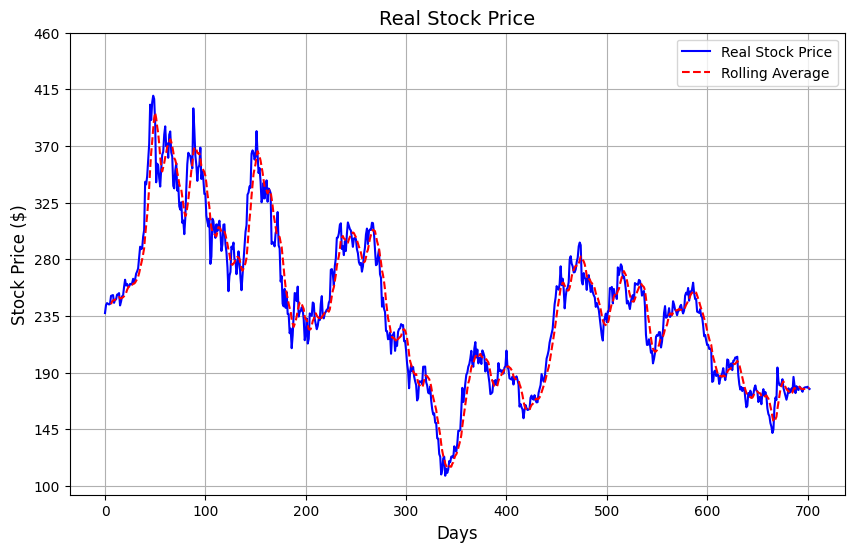

In [ ]:
# Define figure
bmo_real_results = plt.figure(figsize=(10,6))

# Plot results
bmo_real_results = plt.plot(real_stock_price, color = 'blue', label = 'Real Stock Price')
# Plot rolling average (over 7 days)
df_real = pd.DataFrame(real_stock_price)
rolling_avg_real = df_real.rolling(window = 7).mean()
bmo_real_results = plt.plot(rolling_avg_real, "--", color = 'red', label = 'Rolling Average')

# Adjust Y-Axis range
plt.yticks(np.arange(100, 465, 45))
# Plot title and labels
plt.xlabel('Days', fontsize=12)
plt.ylabel('Stock Price ($)', fontsize=12)
plt.title('Real Stock Price', fontsize=14)
# Plot legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()

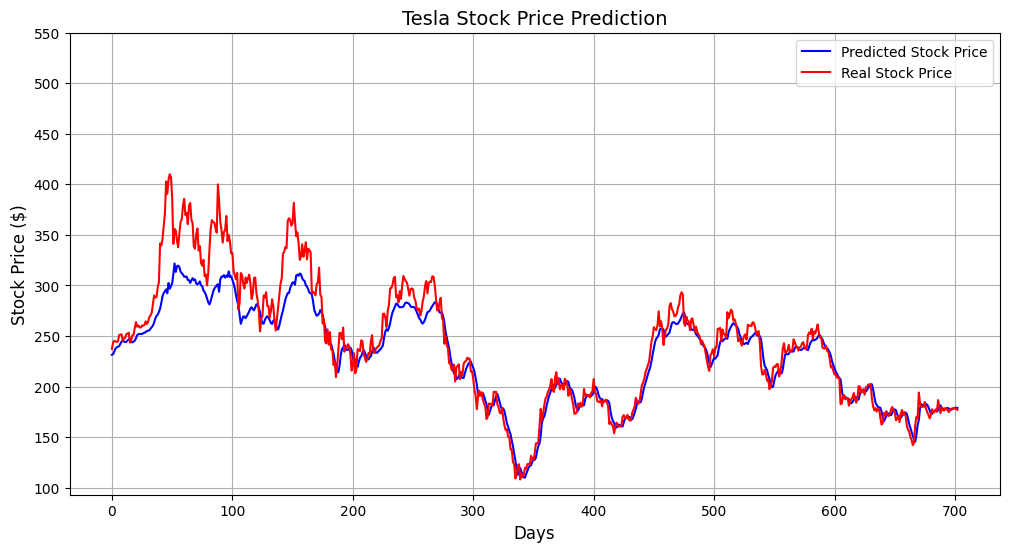

In [ ]:
# Define results figure
bmo_results = plt.figure(figsize=(12,6))

# Plot results
bmo_results = plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
bmo_results = plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
# Adjust Y-Axis range
plt.yticks(np.arange(100, 565, 50))
# Plot title and labels
plt.xlabel('Days', fontsize=12)
plt.ylabel('Stock Price ($)', fontsize=12)
plt.title('Tesla Stock Price Prediction', fontsize=14)
# Plot legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()

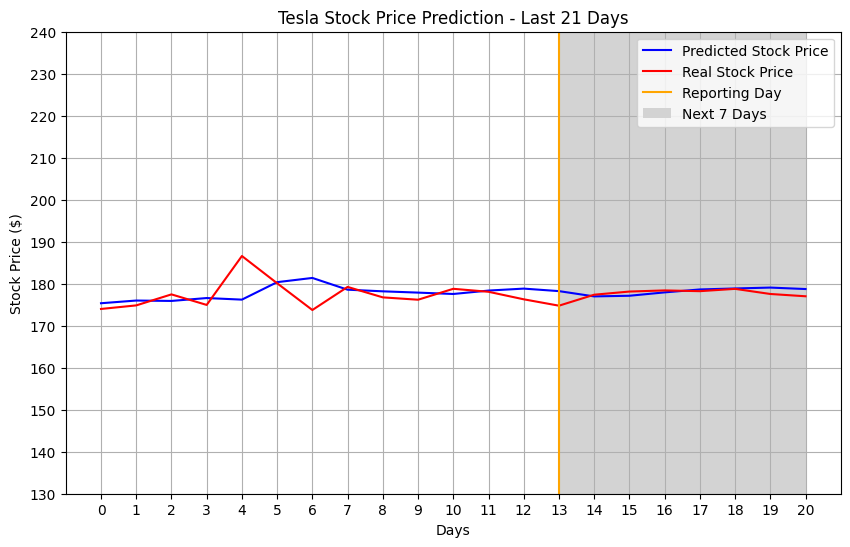

In [ ]:
 # Define results figure - Last 21 days
bmo_results_last_21 = plt.figure(figsize=(10,6))

# Plot results
# Predicted stock price
bmo_results_last_21 = plt.plot(predicted_stock_price[-21:], color = 'blue',
                              label = 'Predicted Stock Price')
# Real stock price
bmo_results_last_21 = plt.plot(real_stock_price[-21:], color = 'red',
                              label = 'Real Stock Price')
# (Current) reporting date
bmo_results_last_21 = plt.axvline(x=(len(real_stock_price[-21:])-(win+1)),
                                 color='orange', label = 'Reporting Day')
# Next 7 days (win)
bmo_results_last_21 = plt.axvspan(13, 20, facecolor='lightgrey', label='Next 7 Days')

# Adjust Y-Axis range
plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(130, 250, 10))
# Plot title and labels
plt.xlabel('Days')
plt.ylabel('Stock Price ($)')
plt.title('Tesla Stock Price Prediction - Last 21 Days')
# Plot legend and grid
plt.legend(loc='upper right')
plt.grid(True)

# Show plot
plt.show()

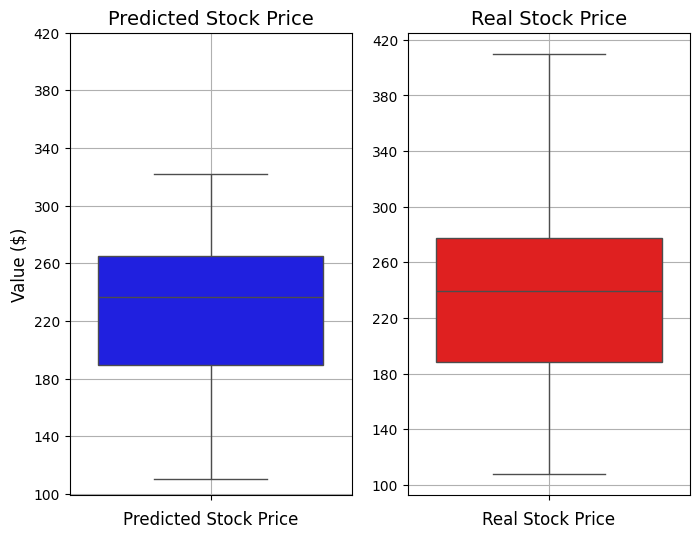

In [ ]:
# Combined box plot distributions
box_plots_comb = plt.figure(figsize=(8, 6))

# Box plot for lr_pred
ax1 = box_plots_comb.add_subplot(1, 2, 1)
# Ensure predicted_stock_price is 1D, if it's a numpy array, flatten it
if isinstance(predicted_stock_price, np.ndarray):
    predicted_stock_price = predicted_stock_price.flatten()
ax1 = sns.boxplot(y=predicted_stock_price, color='blue', orient='v')
# Adjust Y-Axis Range
plt.yticks(np.arange(100, 450, 40))
# Plot title and labels
plt.xlabel('Predicted Stock Price', fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.title('Predicted Stock Price', fontsize=14)
# Plot grid
plt.grid(True)

# Box plot for linear_svr_pred
ax2 = box_plots_comb.add_subplot(1, 2, 2)
# Ensure real_stock_price is 1D, if it's a numpy array, flatten it
if isinstance(real_stock_price, np.ndarray):
    real_stock_price = real_stock_price.flatten()
ax2 = sns.boxplot(y=real_stock_price, color='red', orient='v')
# Adjust Y-Axis Range
plt.yticks(np.arange(100, 450, 40))
# Plot title and label
plt.xlabel('Real Stock Price', fontsize=12)
plt.title('Real Stock Price', fontsize=14)
# Plot grid
plt.grid(True)

# Show subplot
plt.show()

In [ ]:
# Calculate run time
run_time = time.time() - start_time
run_time_min = int(run_time / 60)
run_time_sec = int(run_time % 60)
print("Run Time: " + str(np.round(run_time_min, 0)) + ":" + str(np.round(run_time_sec, 2)))

Run Time: 110:10


In [ ]:
def plot_candlestick(stock_df, name='', rolling_avg=None, fig_size=(1100, 700)):
    """
    Plot a candlestick chart for the given stock dataframe with optional rolling averages.

    Args:
        stock_df (pd.DataFrame): The stock data as a pandas DataFrame.
        name (str): The name of the stock, defaults to 'Tesla'.
        rolling_avg (list of int, optional): A list of integers for rolling average window sizes.
        fig_size (tuple): The figure size, defaults to (1100, 700).
    """
    # Copy df to avoid modifying the original data
    stock_data = stock_df.copy()

    # Creating plot
    fig = go.Figure(data=[go.Candlestick(x=stock_data.index,
        close=stock_data['close'], open=stock_data['open'], high=stock_data['high'], low=stock_data['low'],
        name="Candlesticks", increasing_line_color='green', decreasing_line_color='red', line=dict(width=1)
                                        )])
    # Rolling averages if specified
    if rolling_avg:
        colors = ['rgba(0, 255, 255, 0.5)',   # cyan
                  'rgba(255, 255, 0, 0.5)',   # yellow
                  'rgba(255, 165, 0, 0.5)',   # orange
                  'rgba(255, 105, 180, 0.5)', # pink
                  'rgba(165, 42, 42, 0.5)',   # brown
                  'rgba(128, 128, 128, 0.5)', # gray
                  'rgba(128, 128, 0, 0.5)',   # olive
                  'rgba(0, 0, 255, 0.5)']     # blue

        for i, avg in enumerate(rolling_avg):
            color = colors[i % len(colors)]
            ma_column = f'{avg}-day MA'
            stock_data[ma_column] = stock_data['close'].rolling(window=avg).mean()

            # Moving average trace
            fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data[ma_column],
                    mode='lines', name=f'{avg}-day Moving Average', line=dict(color=color)))

    # Layout updates
    fig.update_layout(title=f"{name} Stock Price - Candlestick Chart",
                      xaxis_title="Date", yaxis_title="Price",
                      width=fig_size[0], height=fig_size[1],
                      xaxis=dict(
                          rangeselector=dict(
                              buttons=list([
                                  dict(count=14, label="2w", step="day", stepmode="backward"),
                                  dict(count=1, label="1m", step="month", stepmode="backward"),
                                  dict(count=3, label="3m", step="month", stepmode="backward"),
                                  dict(count=6, label="6m", step="month", stepmode="backward"),
                                  dict(count=1, label="YTD", step="year", stepmode="todate"),
                                  dict(count=1, label="1y", step="year", stepmode="backward"),
                                  dict(count=2, label="2y", step="year", stepmode="backward"),
                                  dict(count=3, label="3y", step="year", stepmode="backward"),
                                  dict(count=5, label="5y", step="year", stepmode="backward"),
                                  dict(step="all")]),
                              bgcolor='pink',
                              font=dict(color='black'),
                              activecolor='lightgreen'))
                     )
    fig.show()

In [ ]:
# Target stock & columns for modeling
SYMBOL = "TSLA"


# Getting Tesla (TSLA) stock data
ticker = yf.Ticker(SYMBOL)

In [ ]:
# Visualization Imports
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import scipy.stats as stats

In [ ]:
# General Tesla stocks
plot_candlestick(df, name=SYMBOL)

# With Moving averages
plot_candlestick(df, name=SYMBOL, rolling_avg=[20, 50, 200])

KeyError: 'close'